# 一、环境配置与数据加载

## 1.导入必要的库

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

## 2.核心配置：解决中文显示问题

In [54]:
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]  # 支持中文的字体
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题
sns.set(font="SimHei", font_scale=1.2)  # seaborn中文配置

## 3.数据集加载与初步查看

In [55]:
# 数据集指定路径
file_path = r"C:\Users\Lenovo\Desktop\linear regression\NYC Property Sales\nyc-rolling-sales.csv"

# 加载数据，第一行是表头
df = pd.read_csv(file_path)

# 初步查看数据
print("===== 数据集基本信息 =====")
print(f"数据集形状（行, 列）：{df.shape}")
print("\n===== 前5行数据 =====")
display(df.head())  # 显示前5行，观察字段格式
print("\n===== 数据类型与缺失值 =====")
display(df.info())  # 查看各列数据类型及缺失值情况
print("\n===== 数值列统计描述 =====")
display(df.describe())  # 查看数值列的均值、标准差等（初步判断异常值）

===== 数据集基本信息 =====
数据集形状（行, 列）：(84548, 22)

===== 前5行数据 =====


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00



===== 数据类型与缺失值 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS       

None


===== 数值列统计描述 =====


,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


# 二、数据预处理

## 1.处理SALE PRICE（核心目标变量）

In [56]:
df["SALE PRICE"] = df["SALE PRICE"].replace(r'[\$,]', '', regex=True)  # 去除$和逗号
df["SALE PRICE"] = pd.to_numeric(df["SALE PRICE"], errors="coerce")  # 转换为数值
# 排除非实际交易（$0或NaN）和极端高价
df_clean = df[(df["SALE PRICE"] > 0) & (df["SALE PRICE"] <= 1e8)].copy()

## 2.处理SALE DATE（时间特征）

In [57]:
df_clean["SALE DATE"] = pd.to_datetime(df_clean["SALE DATE"], errors="coerce") # 从字符串格式转换为pandas的datetime格式
df_clean["SALE MONTH"] = df_clean["SALE DATE"].dt.month # 提取月份
df_clean["SALE YEAR"] = df_clean["SALE DATE"].dt.year # 提取年份
print("日期转换后的缺失值数量:", df_clean["SALE DATE"].isna().sum())

日期转换后的缺失值数量: 0


## 3.处理BOROUGH（行政区名称映射）

In [58]:
borough_map = {1: "曼哈顿", 2: "布朗克斯", 3: "布鲁克林", 4: "皇后区", 5: "史泰登岛"} # 创建一个字典，将数字编码映射到纽约五大行政区的对应中文名称
df_clean["BOROUGH NAME"] = df_clean["BOROUGH"].map(borough_map) # 将映射结果存储到新列"BOROUGH NAME"中

## 4.其他字段处理

In [59]:
# 处理数值字段中的非数值字符（如' -  '）
numeric_cols = ["LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TOTAL UNITS"]

# 清洗非数值字符，转换为float
for col in numeric_cols:
    df_clean[col] = df_clean[col].replace(r'^\s*-\s*$', np.nan, regex=True)  # 替换' -  '为NaN
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")  # 转为数值类型

## 5.缺失值检查

In [60]:
# 检查清洗后的类型和缺失值
print("===== 数值字段处理结果 =====")
for col in numeric_cols:
    print(f"{col} 类型：{df_clean[col].dtype}，缺失值数量：{df_clean[col].isna().sum()}")

# 用中位数填充缺失值
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 最终确认无缺失值
print("\n===== 填充后缺失值检查 =====")
for col in numeric_cols:
    print(f"{col} 缺失值数量：{df_clean[col].isna().sum()}")

===== 数值字段处理结果 =====
LAND SQUARE FEET 类型：float64，缺失值数量：21185
GROSS SQUARE FEET 类型：float64，缺失值数量：21734
YEAR BUILT 类型：int64，缺失值数量：0
TOTAL UNITS 类型：int64，缺失值数量：0

===== 填充后缺失值检查 =====
LAND SQUARE FEET 缺失值数量：0
GROSS SQUARE FEET 缺失值数量：0
YEAR BUILT 缺失值数量：0
TOTAL UNITS 缺失值数量：0


In [61]:
# 保存处理后的数据集到指定地址
output_path = r"C:\Users\lenovo\Desktop\linear regression\NYC Property Sales\cleaned_data.csv"
df_clean.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"处理后的数据集已保存到: {output_path}")
print(f"保存的数据集形状: {df_clean.shape}")

处理后的数据集已保存到: C:\Users\lenovo\Desktop\linear regression\NYC Property Sales\cleaned_data.csv
保存的数据集形状: (59711, 25)


# 三、探索性分析

## 1.各行政区销售数量对比

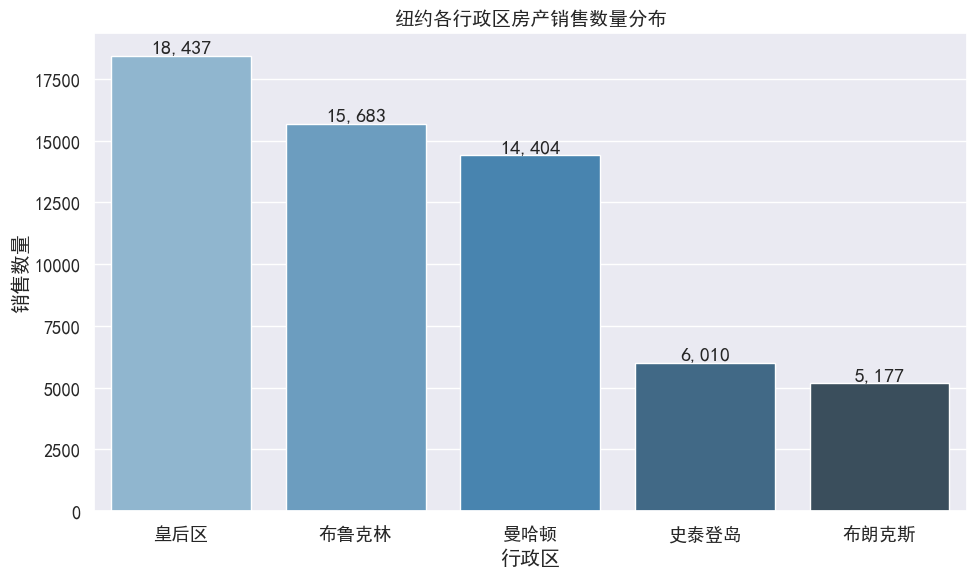

In [49]:
plt.figure(figsize=(10, 6))
borough_counts = df_clean["BOROUGH NAME"].value_counts()

sns.barplot(x=borough_counts.index, y=borough_counts.values, 
           hue=borough_counts.index, palette="Blues_d", legend=False)

plt.title("纽约各行政区房产销售数量分布", fontsize=14, fontweight='bold') 
plt.xlabel("行政区", fontweight='bold') 
plt.ylabel("销售数量", fontweight='bold') 

# 显示具体数值
for i, v in enumerate(borough_counts.values):
    plt.text(i, v + 100, f"{v:,}", ha="center", fontweight='bold')  # 添加千位分隔符

plt.tight_layout()
plt.show()

## 2.各行政区售价分布

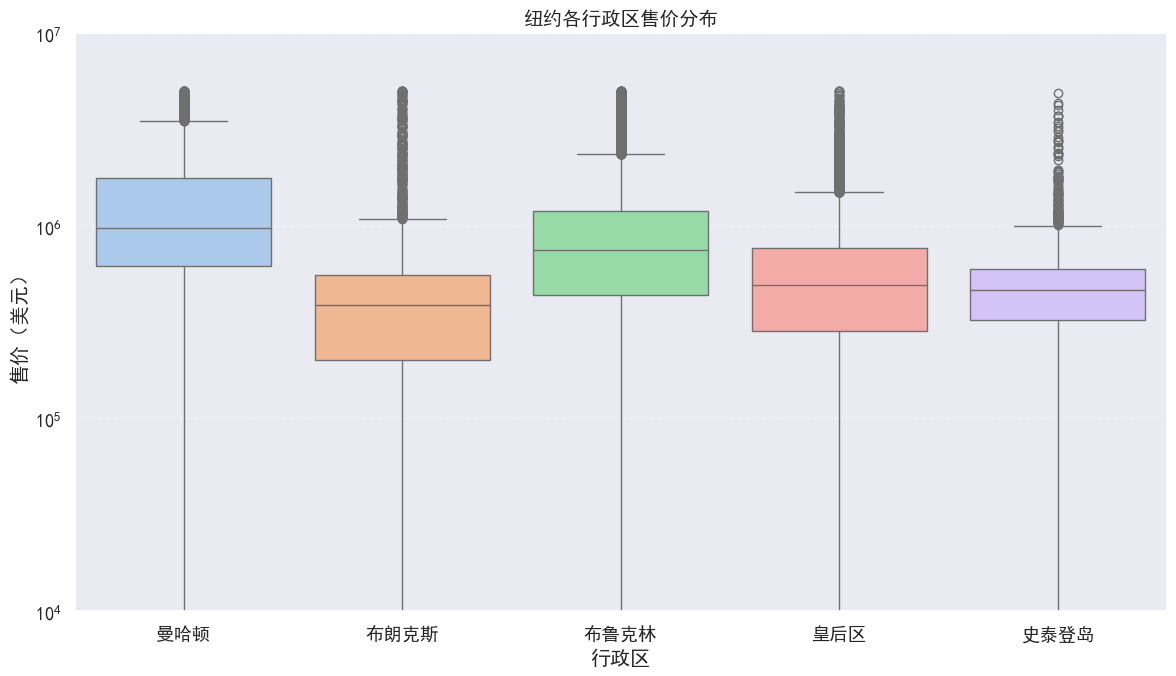

In [44]:
plt.figure(figsize=(12, 7))
filtered_price = df_clean[df_clean["SALE PRICE"] <= 5_000_000]

sns.boxplot(x="BOROUGH NAME", y="SALE PRICE", data=filtered_price,
           hue="BOROUGH NAME", palette="pastel", legend=False)

plt.title("纽约各行政区售价分布", fontsize=14, fontweight='bold')
plt.xlabel("行政区", fontweight='bold')
plt.ylabel("售价（美元）", fontweight='bold')
plt.yscale("log")

# 设置纵坐标范围，聚焦主要价格区间
plt.ylim(1e4, 1e7)  # 限制在1万美元到1千万美元之间

plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

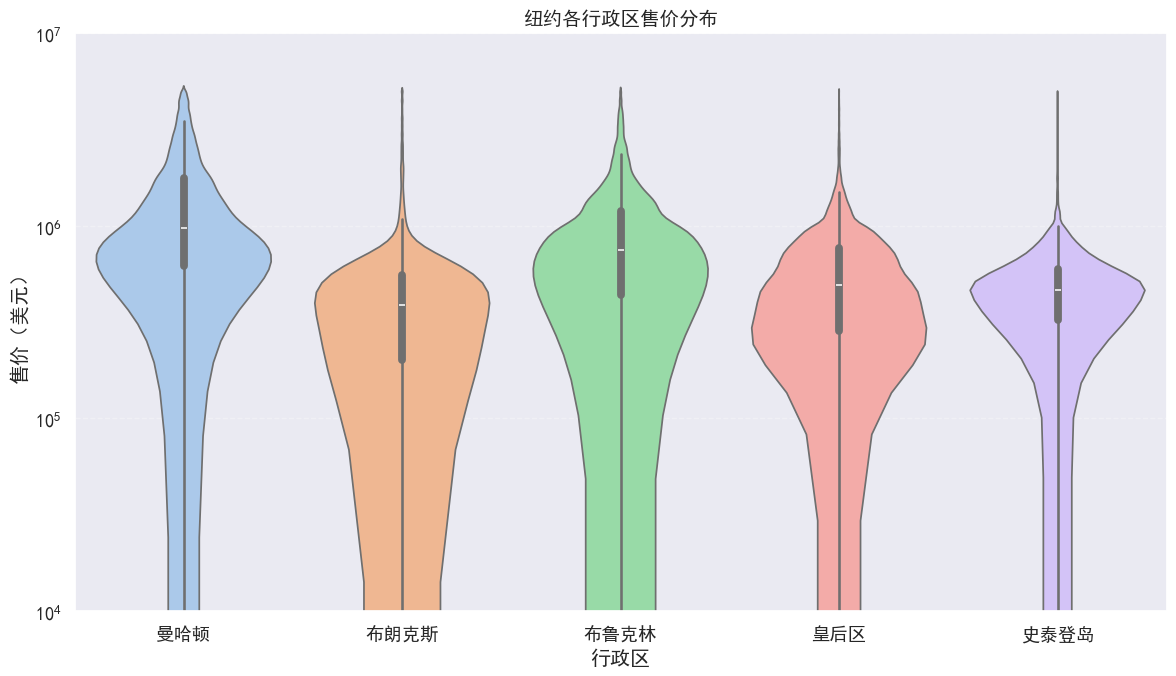

In [45]:
plt.figure(figsize=(12, 7))
filtered_price = df_clean[df_clean["SALE PRICE"] <= 5_000_000]

sns.violinplot(x="BOROUGH NAME", y="SALE PRICE", data=filtered_price,
              hue="BOROUGH NAME", palette="pastel", legend=False)

plt.title("纽约各行政区售价分布", fontsize=14, fontweight='bold')
plt.xlabel("行政区", fontweight='bold')
plt.ylabel("售价（美元）", fontweight='bold')
plt.yscale("log")
plt.ylim(1e4, 1e7)  # 限制范围

plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3.各行政区平均售价对比

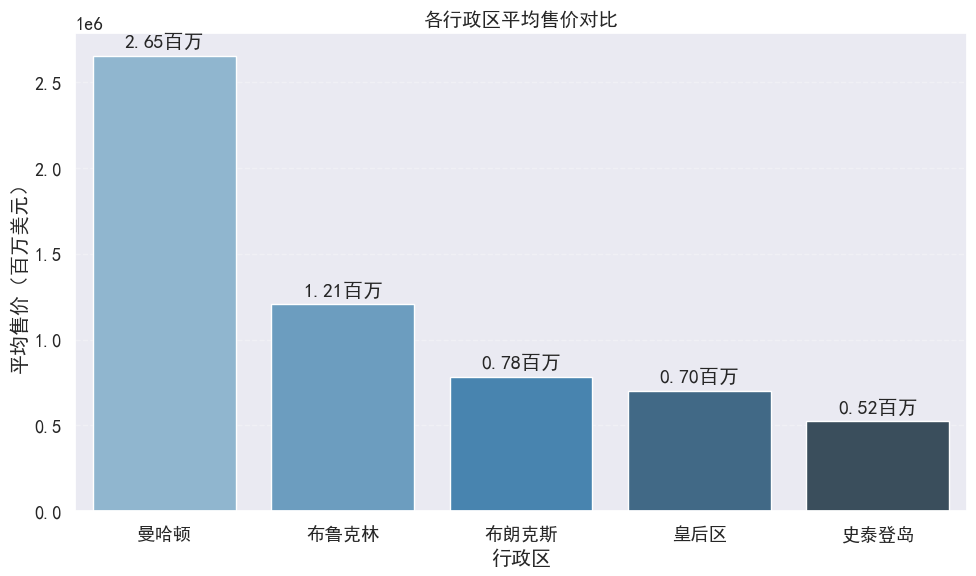

In [50]:
plt.figure(figsize=(10, 6))
borough_mean_price = df_clean.groupby("BOROUGH NAME")["SALE PRICE"].mean().sort_values(ascending=False)

sns.barplot(x=borough_mean_price.index, y=borough_mean_price.values, 
           hue=borough_mean_price.index, palette="Blues_d", legend=False)

plt.title("各行政区平均售价对比", fontsize=14, fontweight='bold')
plt.xlabel("行政区", fontweight='bold')
plt.ylabel("平均售价（百万美元）", fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')

# 显示平均价格（单位：百万美元）
for i, v in enumerate(borough_mean_price.values):
    plt.text(i, v + 50000, f"{v/1e6:.2f}百万", ha="center")

plt.tight_layout()
plt.show()

# 四、模型构建 - 线性回归预测售价

In [63]:
# 读取处理后的数据集数据
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\linear regression\NYC Property Sales\cleaned_data.csv")
# 重命名列名以便处理
df_clean = df.rename(columns={
    'BOROUGH': 'Borough',
    'BUILDING CLASS CATEGORY': 'Build class category',
    'TAX CLASS AT PRESENT': 'Tax class at present', 
    'BUILDING CLASS AT PRESENT': 'Building class at present',
    'RESIDENTIAL UNITS': 'Residential units',
    'COMMERCIAL UNITS': 'Commercial units',
    'TOTAL UNITS': 'Total units',
    'GROSS SQUARE FEET': 'Gross square feet',
    'TAX CLASS AT TIME OF SALE': 'Tax class at time of sale',
    'BUILDING CLASS AT TIME OF SALE': 'Building class at time of sale',
    'SALE PRICE': 'Sale price',
    'SALE YEAR': 'Year sale',
    'SALE MONTH': 'Month sale'
})

## 1.特征提取 - 选取object对象类型列

In [65]:
nycHousePrice_1 = df_clean.select_dtypes(include='object')
print("\n分类变量列:")
print(nycHousePrice_1.columns.tolist())

# 对Borough区进行特征值提取
print("\nBorough区唯一值:")
print(df_clean['Borough'].value_counts())
boroughDf = pd.DataFrame()
boroughDf = pd.get_dummies(df_clean['Borough'], prefix='Borough')
df_clean = pd.concat([df_clean, boroughDf], axis=1)
print("Borough编码完成，新增列:", boroughDf.columns.tolist())

# 对建筑类别进行特征提取
print("\n建筑类别唯一值:")
print(nycHousePrice_1['Build class category'].value_counts())

buildCategoryDf = pd.DataFrame()
buildCategoryDf = pd.get_dummies(nycHousePrice_1['Build class category'], prefix='Build class category')
df_clean = pd.concat([df_clean, buildCategoryDf], axis=1)
print("建筑类别编码完成")

# 对当前建筑税号进行特征提取
print("\n当前税号唯一值:")
print(nycHousePrice_1['Tax class at present'].value_counts())

taxPresentDf = pd.DataFrame()
taxPresentDf = pd.get_dummies(nycHousePrice_1['Tax class at present'], prefix='Tax class at present')
df_clean = pd.concat([df_clean, taxPresentDf], axis=1)
print("当前税号编码完成")

# 对建筑当前类别进行特征提取
print("\n当前建筑类别唯一值:")
print(nycHousePrice_1['Building class at present'].value_counts())

buildClassPresentDf = pd.DataFrame()
buildClassPresentDf = pd.get_dummies(nycHousePrice_1['Building class at present'], prefix='Building class at present')
df_clean = pd.concat([df_clean, buildClassPresentDf], axis=1)
print("当前建筑类别编码完成")

# 对销售时建筑类别进行提取
print("\n销售时建筑类别唯一值:")
print(nycHousePrice_1['Building class at time of sale'].value_counts())

buildClassSaleDf = pd.DataFrame()
buildClassSaleDf = pd.get_dummies(nycHousePrice_1['Building class at time of sale'], prefix='Building class at time of sale')
df_clean = pd.concat([df_clean, buildClassSaleDf], axis=1)
print("销售时建筑类别编码完成")

# 对销售年份进行特征提取
yearSale = pd.DataFrame() 
yearSale = pd.get_dummies(df_clean['Year sale'].astype(str), prefix='Year sale')
df_clean = pd.concat([df_clean, yearSale], axis=1)
print("销售年份编码完成")

yearSale = pd.DataFrame()
yearSale = pd.get_dummies(df_clean['Year sale'].astype(str), prefix='Year sale')
df_clean = pd.concat([df_clean, yearSale], axis=1)
print("销售年份编码完成")

# 对销售月份进行特征提取
print("\n销售月份唯一值:")
print(df_clean['Month sale'].value_counts())
monthSale = pd.DataFrame()
monthSale = pd.get_dummies(df_clean['Month sale'].astype(str), prefix='Month sale')
df_clean = pd.concat([df_clean, monthSale], axis=1)
print("销售月份编码完成")


分类变量列:
['NEIGHBORHOOD', 'Build class category', 'Tax class at present', 'EASE-MENT', 'Building class at present', 'ADDRESS', 'APARTMENT NUMBER', 'Building class at time of sale', 'SALE DATE', 'BOROUGH NAME']

Borough区唯一值:
Borough
4    18437
3    15683
1    14404
5     6010
2     5177
Name: count, dtype: int64
Borough编码完成，新增列: ['Borough_1', 'Borough_2', 'Borough_3', 'Borough_4', 'Borough_5']

建筑类别唯一值:
Build class category
01 ONE FAMILY DWELLINGS                         13007
10 COOPS - ELEVATOR APARTMENTS                  11541
13 CONDOS - ELEVATOR APARTMENTS                 10411
02 TWO FAMILY DWELLINGS                         10156
09 COOPS - WALKUP APARTMENTS                     2512
03 THREE FAMILY DWELLINGS                        2415
07 RENTALS - WALKUP APARTMENTS                   1803
04 TAX CLASS 1 CONDOS                            1275
17 CONDO COOPS                                   1112
15 CONDOS - 2-10 UNIT RESIDENTIAL                1042
12 CONDOS - WALKUP APARTMENTS     

## 2.查看相关系数矩阵


计算相关系数矩阵...

与房价相关性最高的特征:
Sale price                   1.000000
Tax class at time of sale    0.216284
Gross square feet            0.203793
Residential units            0.193964
Total units                  0.178350
LAND SQUARE FEET             0.082285
LOT                          0.061003
Commercial units             0.038147
Month sale                   0.003910
Year sale                   -0.001548
YEAR BUILT                  -0.020674
Unnamed: 0                  -0.032420
ZIP CODE                    -0.081688
BLOCK                       -0.163009
Borough                     -0.202294
Name: Sale price, dtype: float64

选择的特征: ['Tax class at time of sale', 'Gross square feet', 'Residential units', 'Total units', 'LAND SQUARE FEET', 'LOT', 'Commercial units', 'Month sale', 'Year sale', 'YEAR BUILT', 'Unnamed: 0', 'ZIP CODE', 'BLOCK', 'Borough']


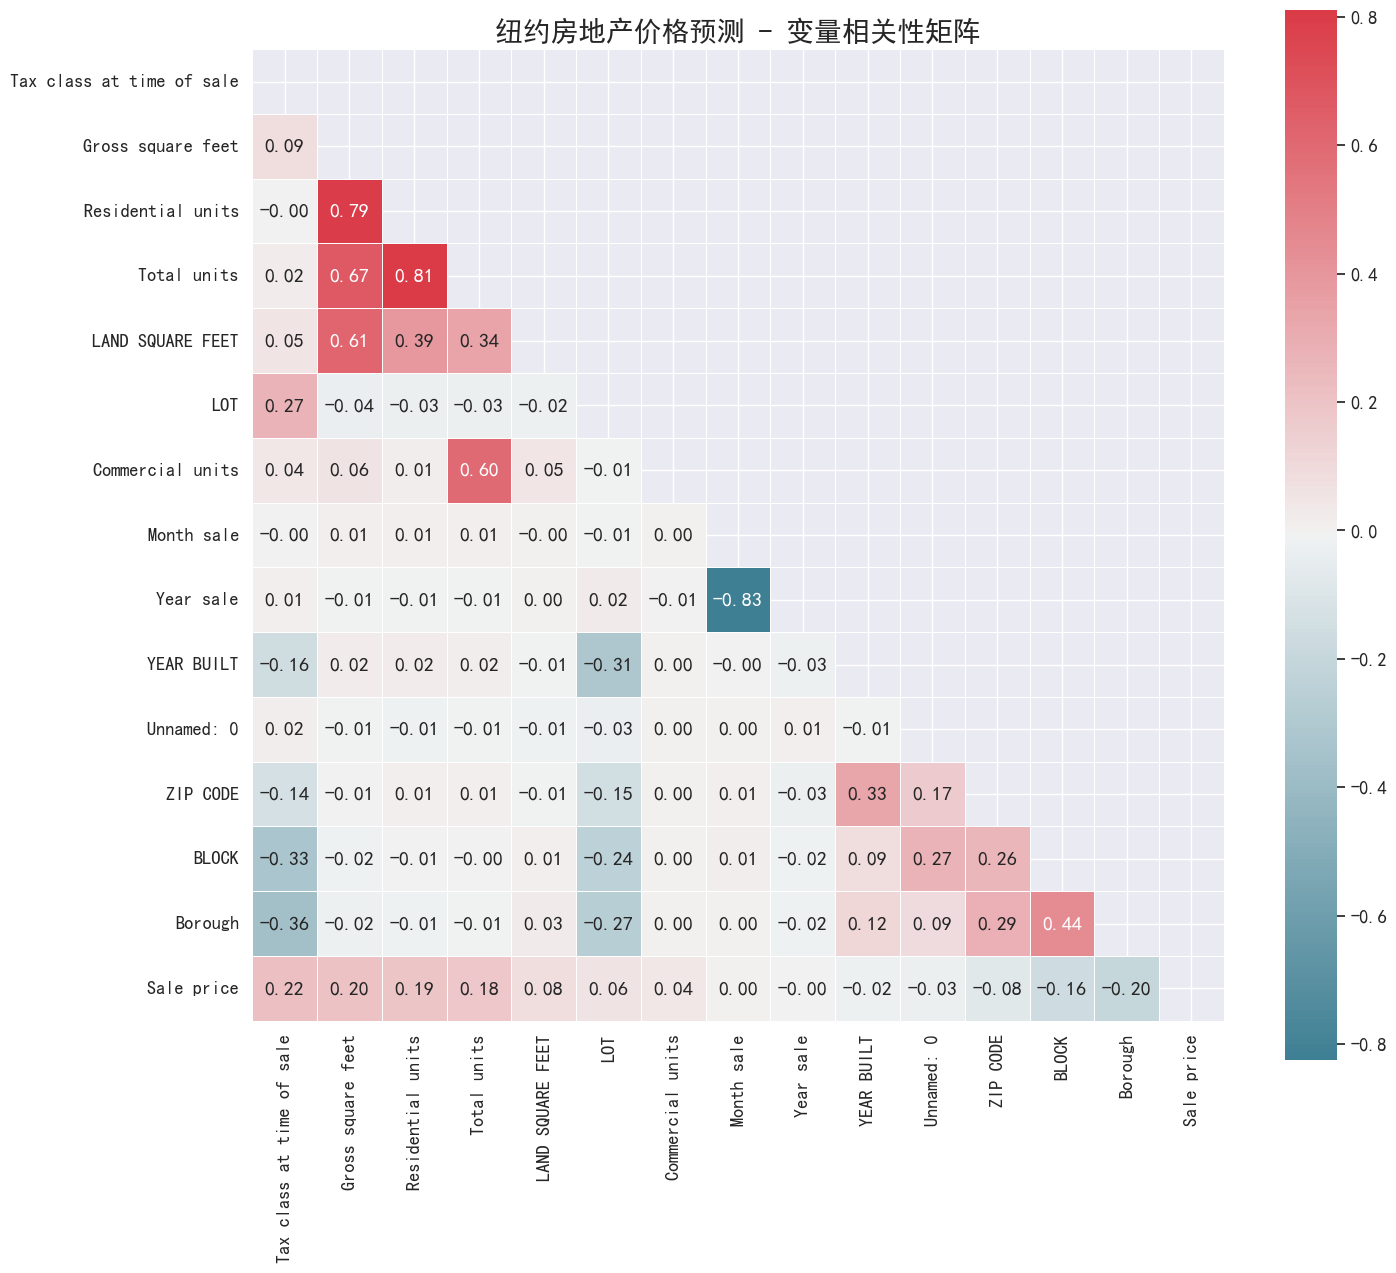


最终选择的特征 (6个): ['Tax class at time of sale', 'Gross square feet', 'Residential units', 'Total units', 'BLOCK', 'Borough']


In [66]:
print("\n计算相关系数矩阵...")
corrDf = df_clean.select_dtypes(include=[np.number]).corr()

# 查看各个特征与房价的相关系数
print("\n与房价相关性最高的特征:")
price_corr = corrDf['Sale price'].sort_values(ascending=False)
print(price_corr.head(20))

# 提取重要特征构建数据集（基于相关性选择前15个特征）
top_features = price_corr[1:16].index.tolist()  # 排除Sale price本身
print(f"\n选择的特征: {top_features}")

nycPriceData = df_clean[top_features + ['Sale price']]

# 可视化相关性矩阵
plt.figure(figsize=(15, 13))
corr_X = nycPriceData.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_X, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_X, mask=mask, square=True, linewidths=.5, 
            annot=True, cmap=cmap, fmt='.2f')
plt.yticks(rotation=0)
plt.title('纽约房地产价格预测 - 变量相关性矩阵', size=20)
plt.tight_layout()
plt.show()

# 最终特征选择（排除与目标变量相关性低的特征）
selected_features = [feature for feature in top_features if abs(corr_X.loc[feature, 'Sale price']) > 0.1]
print(f"\n最终选择的特征 ({len(selected_features)}个): {selected_features}")

nycHousePrice_X = df_clean[selected_features]
source_y = df_clean['Sale price']

## 3.模型构建与评估

In [67]:
# 训练集和测试集的生成
train_X, test_X, train_y, test_y = train_test_split(
    nycHousePrice_X, source_y, train_size=0.8, random_state=42
)

print(f"\n数据集划分:")
print(f'原始数据集特征: {nycHousePrice_X.shape}')
print(f'训练数据集特征: {train_X.shape}')
print(f'测试数据集特征: {test_X.shape}')
print(f'原始数据集标签: {source_y.shape}')
print(f'训练数据集标签: {train_y.shape}')
print(f'测试数据集标签: {test_y.shape}')

# 建立模型
print("\n训练线性回归模型...")
model = LinearRegression()
model.fit(train_X, train_y)

# 模型评估
train_score = model.score(train_X, train_y)
test_score = model.score(test_X, test_y)

print(f"\n模型评估结果:")
print(f'训练集R²分数: {train_score:.4f}')
print(f'测试集R²分数: {test_score:.4f}')


数据集划分:
原始数据集特征: (59711, 6)
训练数据集特征: (47768, 6)
测试数据集特征: (11943, 6)
原始数据集标签: (59711,)
训练数据集标签: (47768,)
测试数据集标签: (11943,)

训练线性回归模型...

模型评估结果:
训练集R²分数: 0.1255
测试集R²分数: -0.8643



特征重要性排序:
                     feature     importance    coefficient
0  Tax class at time of sale  702115.783634  702115.783634
5                    Borough  322906.213570 -322906.213570
3                Total units  168786.390924  168786.390924
2          Residential units  119637.255871 -119637.255871
4                      BLOCK      60.854404     -60.854404
1          Gross square feet       1.629936       1.629936


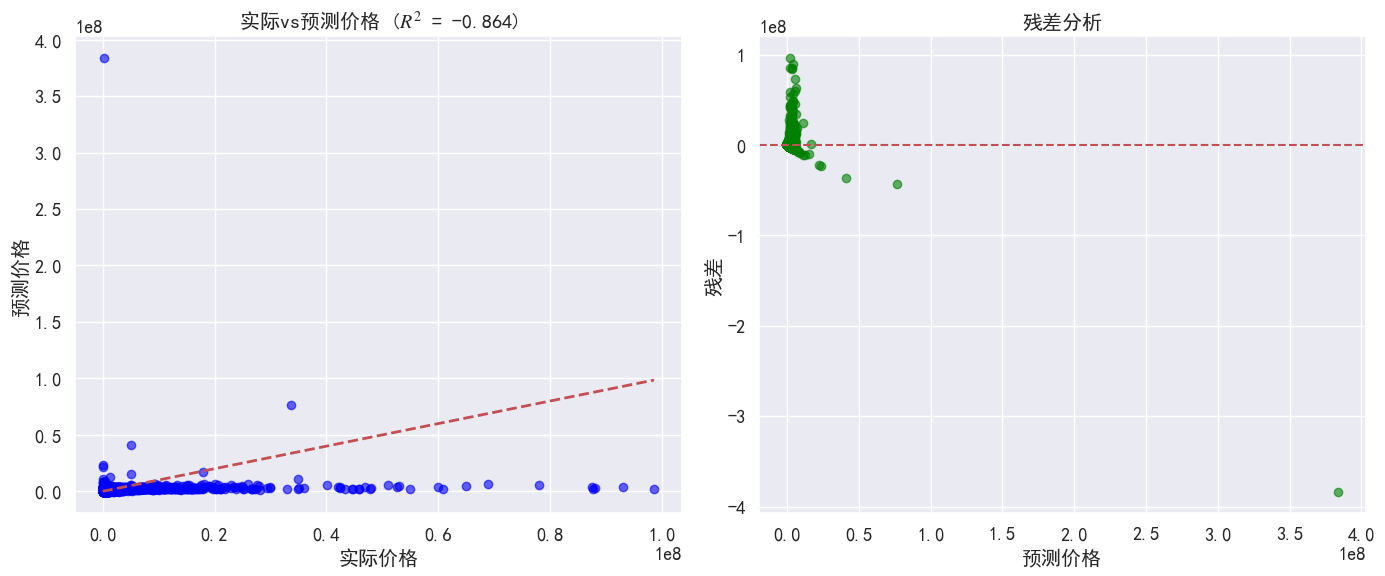

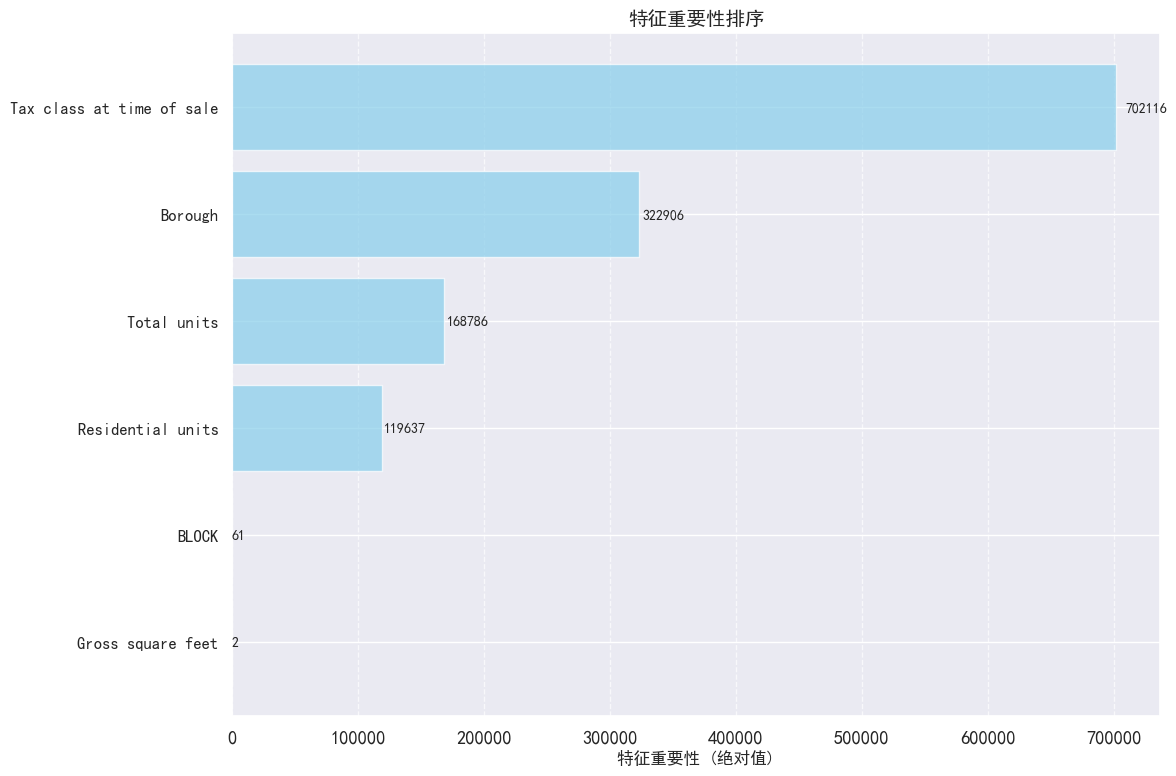


模型构建完成！

特征重要性排序:
                  feature    importance    coefficient
Tax class at time of sale 702115.783634  702115.783634
                  Borough 322906.213570 -322906.213570
              Total units 168786.390924  168786.390924
        Residential units 119637.255871 -119637.255871
                    BLOCK     60.854404     -60.854404
        Gross square feet      1.629936       1.629936

模型性能总结:
训练集 R²: 0.1255
测试集 R²: -0.8643
使用特征数量: 6
样本数量: 59711


In [71]:
# 特征重要性分析
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': abs(model.coef_),
    'coefficient': model.coef_
}).sort_values('importance', ascending=False)

print(f"\n特征重要性排序:")
print(feature_importance)

# 设置中文字体和数学符号支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 添加备用字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'  # 使用STIX字体处理数学符号

# 创建图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 实际vs预测值图
y_pred = model.predict(test_X)
ax1.scatter(test_y, y_pred, alpha=0.6, color='blue')
ax1.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
ax1.set_xlabel('实际价格')
ax1.set_ylabel('预测价格')
ax1.set_title(f'实际vs预测价格 ($R^2$ = {test_score:.3f})')  # 使用LaTeX格式的数学符号

# 残差图
residuals = test_y - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6, color='green')
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('预测价格')
ax2.set_ylabel('残差')
ax2.set_title('残差分析')

plt.tight_layout()
plt.show()

# 特征重要性可视化 - 修正函数名错误
plt.figure(figsize=(12, 8))
feature_importance_sorted = feature_importance.sort_values('importance', ascending=True)

# 使用barh而不是barn
plt.barh(range(len(feature_importance_sorted)), 
         feature_importance_sorted['importance'], 
         color='skyblue', alpha=0.7)

plt.yticks(range(len(feature_importance_sorted)), 
           feature_importance_sorted['feature'], fontsize=12)
plt.xlabel('特征重要性 (绝对值)', fontsize=12)
plt.title('特征重要性排序', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 在条形图右侧添加系数值
for i, v in enumerate(feature_importance_sorted['importance']):
    plt.text(v + v*0.01, i, f'{v:.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n模型构建完成！")
print("\n特征重要性排序:")
print(feature_importance.to_string(index=False))

# 打印模型性能总结
print(f"\n模型性能总结:")
print(f"训练集 R²: {train_score:.4f}")
print(f"测试集 R²: {test_score:.4f}")
print(f"使用特征数量: {len(selected_features)}")
print(f"样本数量: {len(df_clean)}")

# 下面针对纽约市各个区经济与人口情况进行对比分析

# 一、数据预处理

In [84]:
# 读取数据集
blocks = pd.read_csv(r"C:\Users\Lenovo\Desktop\linear regression\archive\census_block_loc.csv")
census = pd.read_csv(r"C:\Users\Lenovo\Desktop\linear regression\archive\nyc_census_tracts.csv",index_col=0)

In [85]:
blocks.head() # 坐标映射

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [86]:
census.head() # 普查数据

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


## 1.将人口普查数据与位置数据合并

In [87]:
blocks = blocks[blocks.County.isin(['Bronx','Kings','New York','Queens','Richmond'])] # 过滤只保留纽约市五个区的数据
blocks['Tract'] = blocks.BlockCode // 10000
blocks = blocks.merge(census,how='left',right_index=True,left_on='Tract') # 使用左连接合并位置数据和普查数据

blocks.head()

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
15,40.48,-74.232513,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
16,40.48,-74.229347,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
17,40.48,-74.226181,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
18,40.48,-74.223015,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
19,40.48,-74.219849,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [88]:
blocks.info()
blocks.Income = pd.to_numeric(blocks.Income,errors='coerce') # 将Income列转换为数值类型，处理可能的格式问题

<class 'pandas.core.frame.DataFrame'>
Index: 18053 entries, 15 to 37111
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         18053 non-null  float64
 1   Longitude        18053 non-null  float64
 2   BlockCode        18053 non-null  int64  
 3   County_x         18053 non-null  object 
 4   State            18053 non-null  object 
 5   Tract            18053 non-null  int64  
 6   County_y         18052 non-null  object 
 7   Borough          18052 non-null  object 
 8   TotalPop         18052 non-null  float64
 9   Men              18052 non-null  float64
 10  Women            18052 non-null  float64
 11  Hispanic         12999 non-null  float64
 12  White            12999 non-null  float64
 13  Black            12999 non-null  float64
 14  Native           12999 non-null  float64
 15  Asian            12999 non-null  float64
 16  Citizen          18052 non-null  float64
 17  Income          

## 2.将空间数据转换为二维数组

In [89]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

# 二、空间可视化呈现

In [90]:
def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    
    plt.show()

## 1.人口分布

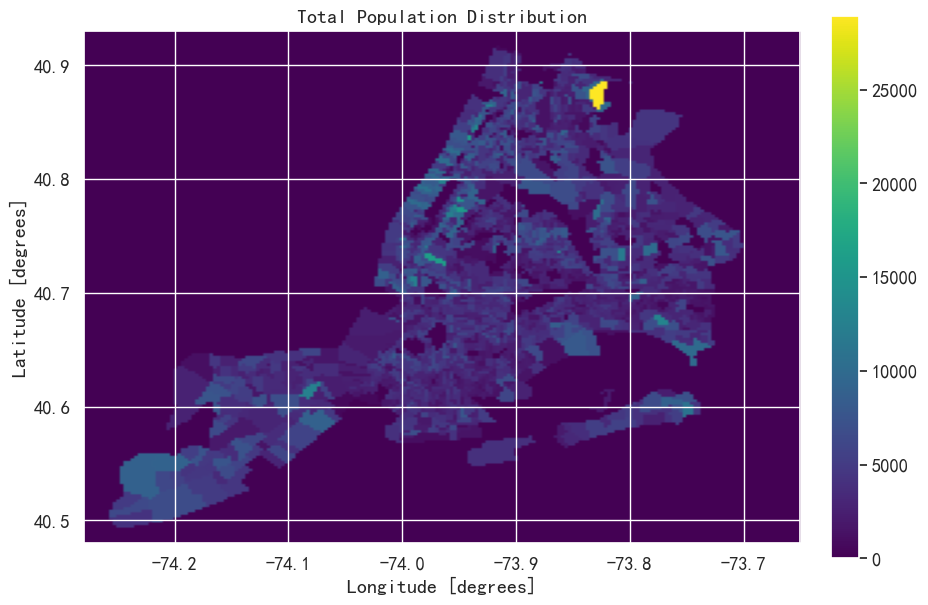

In [95]:
make_plot(blocks.TotalPop, colors='viridis', title='Total Population Distribution')

## 2.收入水平分布

#### 这里是家庭收入的中位数和人均收入。曼哈顿西侧125thSt以下和东侧96thSt以下通常是最富裕的地区。布朗克斯区的中部和南部似乎是最贫穷的地区。曼哈顿与其余城市的差异在人均收入地图中增加。这表明曼哈顿家庭的人口数量少于其他行政区。

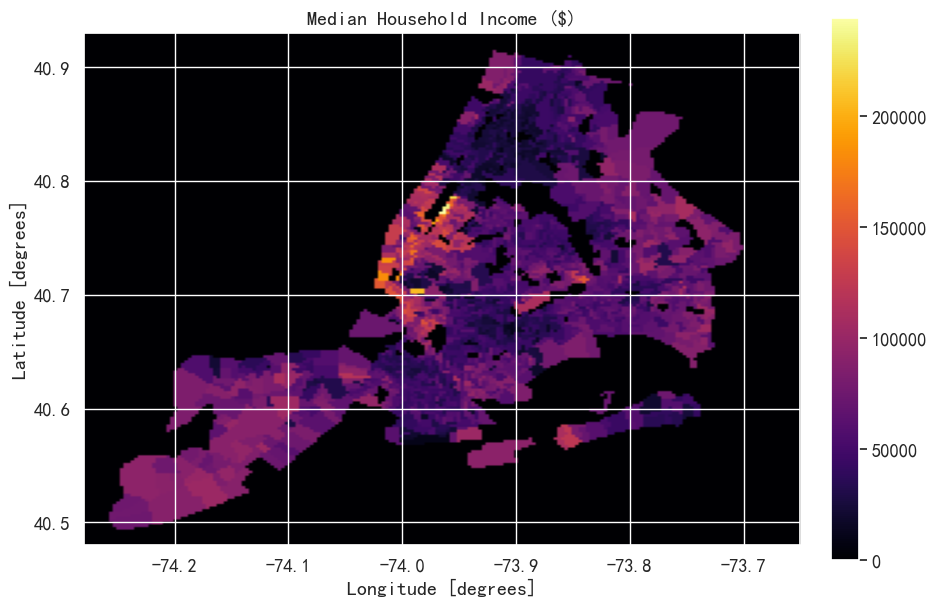

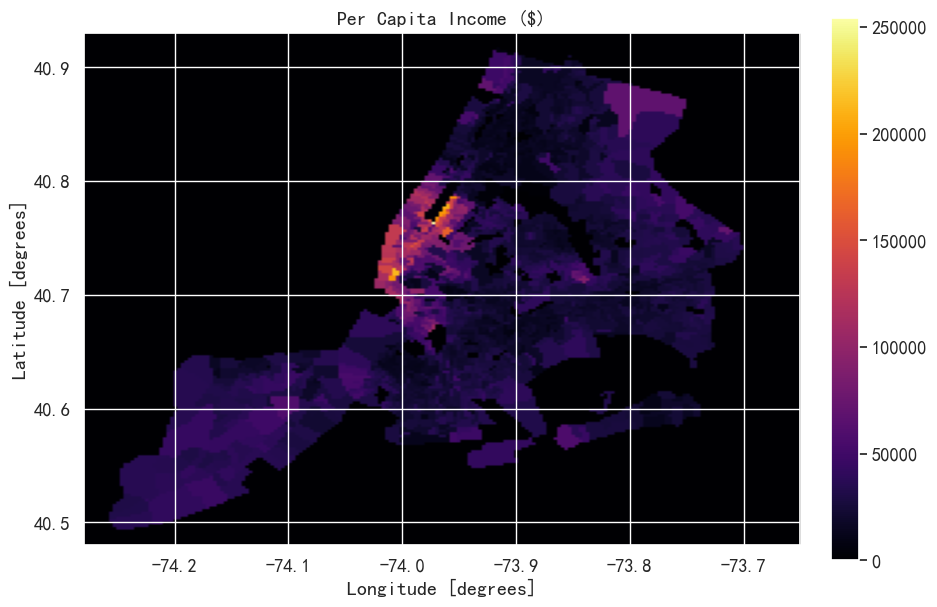

In [92]:
make_plot(blocks.Income,colors='inferno',title='Median Household Income ($)') # 家庭收入中位数分布
make_plot(blocks.IncomePerCap,colors='inferno',title='Per Capita Income ($)') # 人均收入分布

## 3.贫困率分布

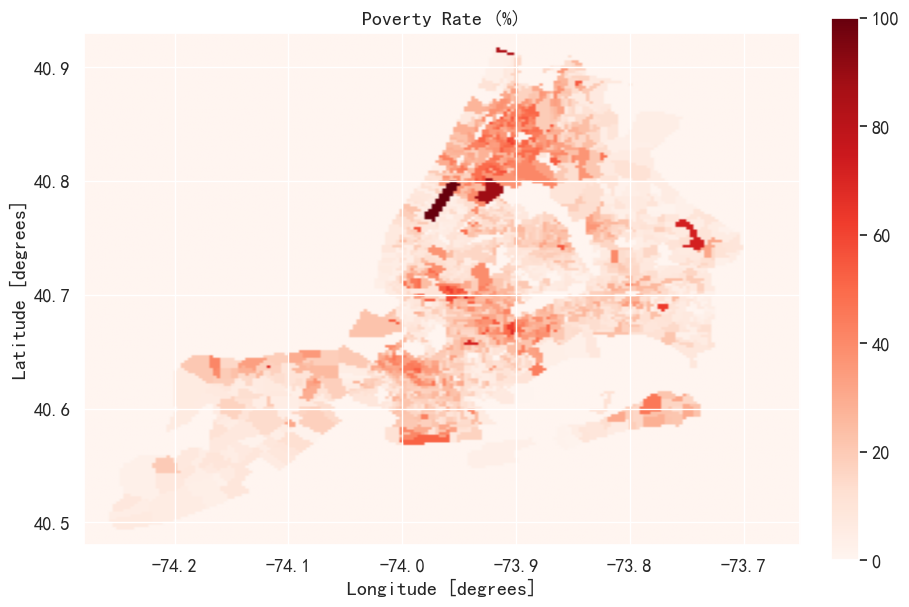

In [96]:
make_plot(blocks.Poverty, colors='Reds', title='Poverty Rate (%)')

## 4.职业类型分布

#### 在曼哈顿、布鲁克林，从市中心到展望公园、里弗代尔和皇后区的一些地区，人们很可能从事专业工作。其他地方的人似乎大多从事工人阶级的工作。这在南布朗克斯和布鲁克林中部的大片地区尤其明显。

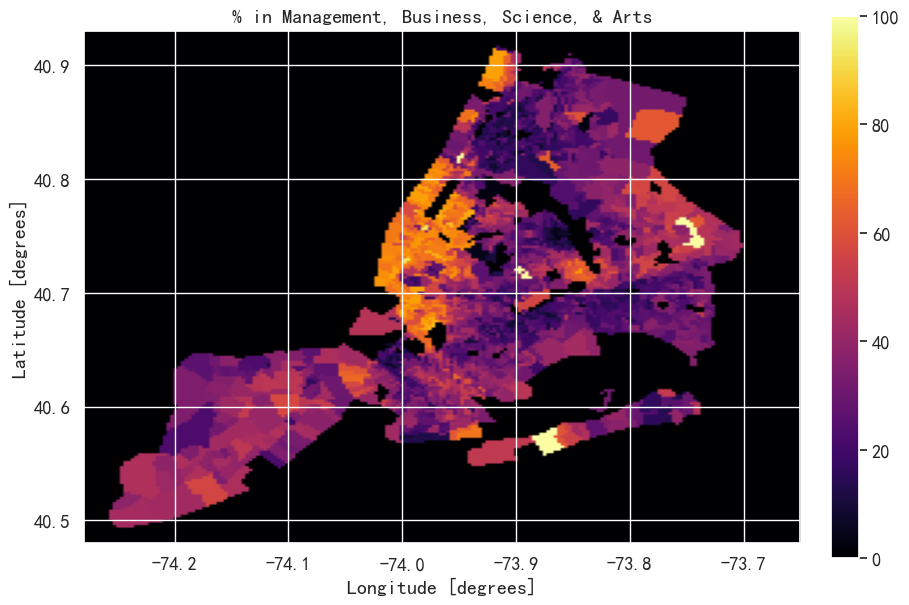

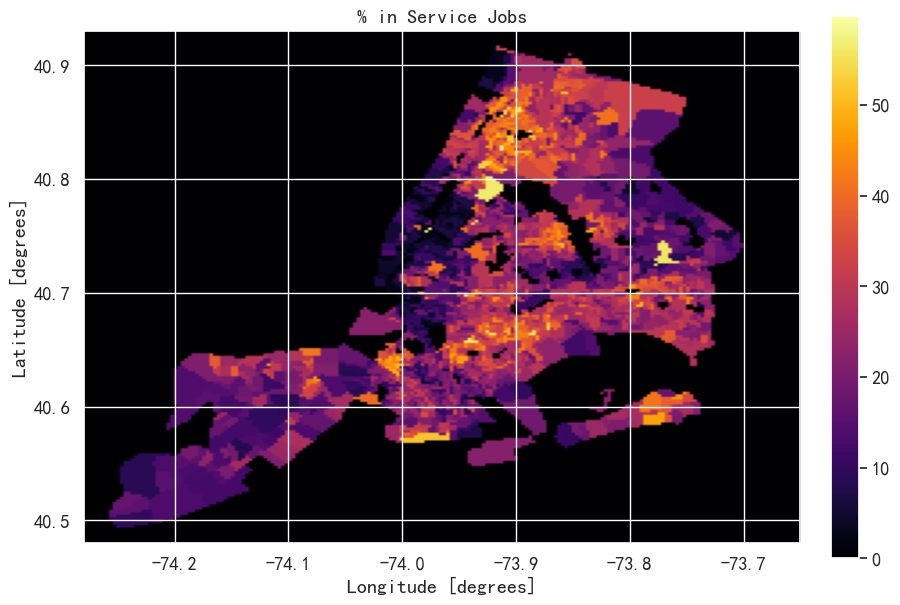

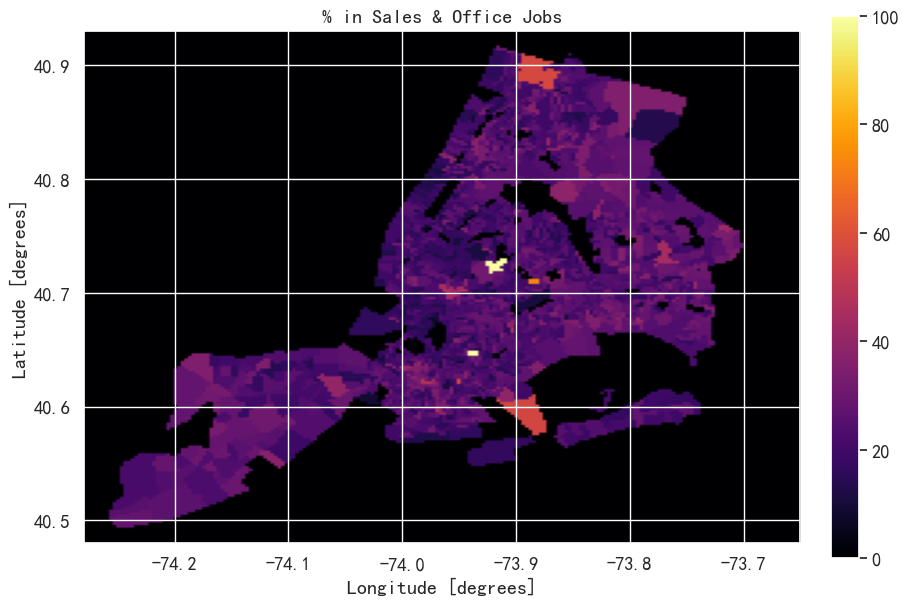

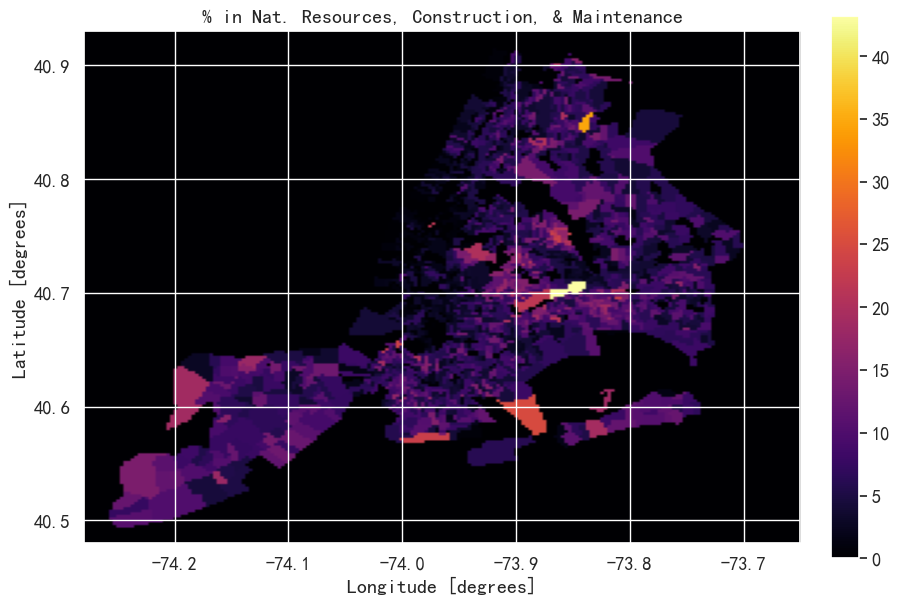

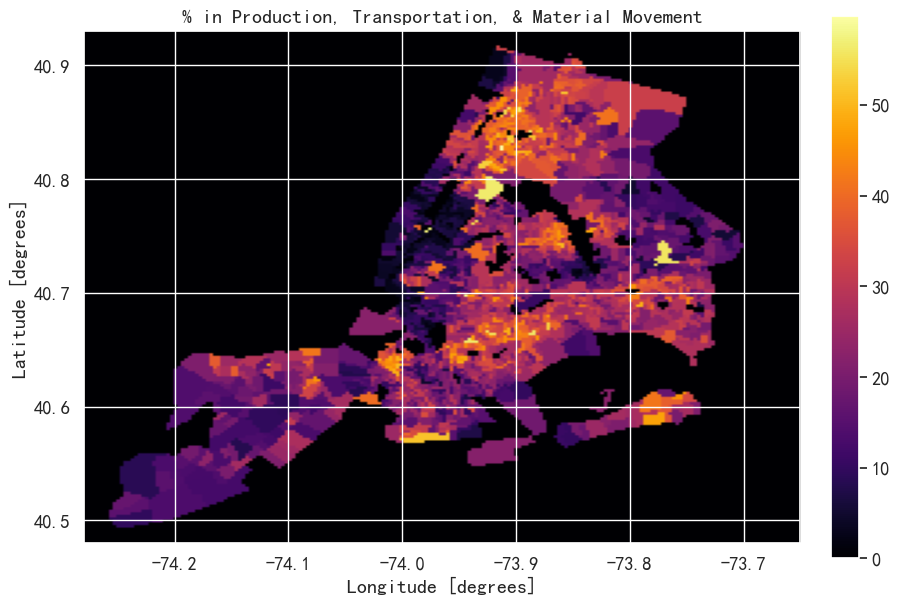

In [94]:
make_plot(blocks.Professional,colors='inferno',title='% in Management, Business, Science, & Arts') # 专业职位比例图
make_plot(blocks.Service,colors='inferno',title='% in Service Jobs') # 服务类工作比例图
make_plot(blocks.Office,colors='inferno',title='% in Sales & Office Jobs') # 销售和办公室工作比例图
make_plot(blocks.Construction,colors='inferno',title='% in Nat. Resources, Construction, & Maintenance') # 建筑和维护工作比例图
make_plot(blocks.Service,colors='inferno',title='% in Production, Transportation, & Material Movement') # 生产和运输工作比例图